In [6]:
import numpy as np
import matplotlib.image as mpimg
import tensorflow as tf
import random
import os
import json
from zipfile import ZipFile
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers,models

In [2]:
!pip install kaggle

In [3]:
data=json.load(open('/content/kaggle.json'))
os.environ['KAGGLE_USERNAME']=data['username']
os.environ['KAGGLE_KEY']=data['key']

In [5]:
!kaggle datasets download -d abdallahalidev/plantvillage-dataset

Dataset URL: https://www.kaggle.com/datasets/abdallahalidev/plantvillage-dataset
License(s): CC-BY-NC-SA-4.0
100% 2.04G/2.04G [01:39<00:00, 22.6MB/s]
100% 2.04G/2.04G [01:39<00:00, 22.1MB/s]


In [6]:
with ZipFile('/content/plantvillage-dataset.zip','r') as zip:
  zip.extractall()

In [7]:
print(os.listdir('/content/plantvillage dataset'))

['color', 'grayscale', 'segmented']


In [8]:
print((os.listdir('/content/plantvillage dataset/grayscale')))

['Strawberry___healthy', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Corn_(maize)___Northern_Leaf_Blight', 'Apple___Cedar_apple_rust', 'Pepper,_bell___healthy', 'Blueberry___healthy', 'Potato___Early_blight', 'Raspberry___healthy', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Apple___healthy', 'Tomato___Early_blight', 'Soybean___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Grape___Esca_(Black_Measles)', 'Tomato___Tomato_mosaic_virus', 'Corn_(maize)___Common_rust_', 'Grape___healthy', 'Squash___Powdery_mildew', 'Potato___healthy', 'Apple___Black_rot', 'Strawberry___Leaf_scorch', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Potato___Late_blight', 'Apple___Apple_scab', 'Pepper,_bell___Bacterial_spot', 'Tomato___Target_Spot', 'Tomato___Bacterial_spot', 'Tomato___Leaf_Mold', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Tomato___Septoria_le

In [4]:
bdir='/content/plantvillage dataset/color'

(256, 256, 3)


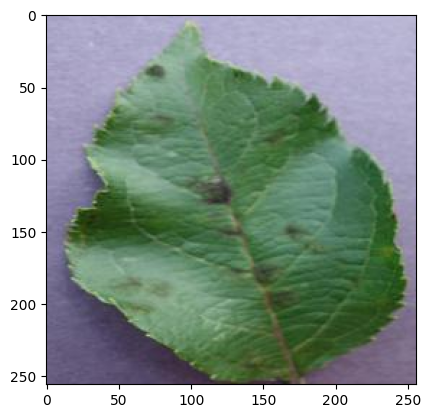

In [7]:
imagesp='/content/plantvillage dataset/color/Apple___Apple_scab/00075aa8-d81a-4184-8541-b692b78d398a___FREC_Scab 3335.JPG'
img=mpimg.imread(imagesp)
print(img.shape)
plt.imshow(img)
plt.axis('on')
plt.show()

In [9]:
img_s=224
batch_s=32

In [10]:
#Data Genrator
data_g=ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

In [11]:
train_generator = data_g.flow_from_directory(
    bdir,
    target_size=(img_s, img_s),
    batch_size=batch_s,
    subset='training',
    class_mode='categorical'
)

Found 43456 images belonging to 38 classes.


In [12]:
validation_generator = data_g.flow_from_directory(
    bdir,
    target_size=(img_s, img_s),
    batch_size=batch_s,
    subset='validation',
    class_mode='categorical'
)

Found 10849 images belonging to 38 classes.


CNN

In [13]:
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(img_s,img_s,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(38,activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 346112)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │     177,209,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 38)                  │          19,494 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 177,322,598 (676.43 MB)

 Trainable params: 177,322,598 (676.43 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

Model Evaluation

In [16]:
#train model
h=model.fit(train_generator,
            steps_per_epoch=train_generator.samples,epochs=1,validation_data=validation_generator,validation_steps=validation_generator.samples)

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 1358/43456 ━━━━━━━━━━━━━━━━━━━━ 1:00:16 86ms/step - accuracy: 0.5958 - loss: 1.7161

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


43456/43456 ━━━━━━━━━━━━━━━━━━━━ 168s 4ms/step - accuracy: 0.7380 - loss: 0.9422 - val_accuracy: 0.8580 - val_loss: 0.4500


In [17]:
val_loss,accuracy=model.evaluate(validation_generator,steps=validation_generator.samples)
print(accuracy)

10849/10849 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.8581 - loss: 0.4497  
0.8579592704772949


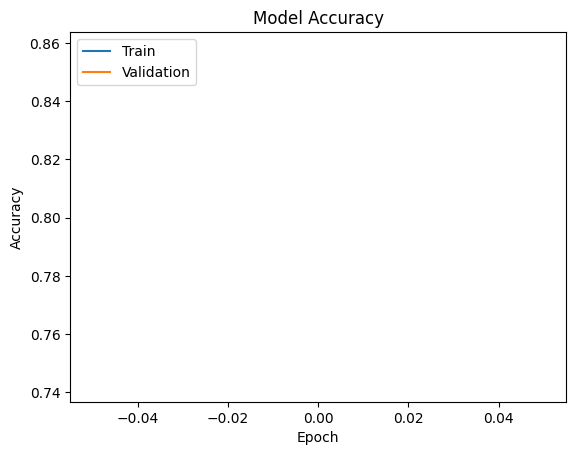

In [18]:
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='upper left')
plt.show()

Predictive Model

In [19]:
def load(image_path, target_size):
    img = Image.open(image_path)
    img = img.resize(target_size)
    img_array = np.array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array.astype('float32') / 255.0
    return img_array

def predict(model, image_path, class_indices):
    img = load(image_path, (224, 224))
    prediction = model.predict(img)
    predicted_class_index = np.argmax(prediction)
    predicted_class = class_indices[predicted_class_index]
    return predicted_class

In [20]:
class_indices={v:k for k,v in train_generator.class_indices.items()}
class_indices

{0: 'Apple___Apple_scab',
 1: 'Apple___Black_rot',
 2: 'Apple___Cedar_apple_rust',
 3: 'Apple___healthy',
 4: 'Blueberry___healthy',
 5: 'Cherry_(including_sour)___Powdery_mildew',
 6: 'Cherry_(including_sour)___healthy',
 7: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 8: 'Corn_(maize)___Common_rust_',
 9: 'Corn_(maize)___Northern_Leaf_Blight',
 10: 'Corn_(maize)___healthy',
 11: 'Grape___Black_rot',
 12: 'Grape___Esca_(Black_Measles)',
 13: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 14: 'Grape___healthy',
 15: 'Orange___Haunglongbing_(Citrus_greening)',
 16: 'Peach___Bacterial_spot',
 17: 'Peach___healthy',
 18: 'Pepper,_bell___Bacterial_spot',
 19: 'Pepper,_bell___healthy',
 20: 'Potato___Early_blight',
 21: 'Potato___Late_blight',
 22: 'Potato___healthy',
 23: 'Raspberry___healthy',
 24: 'Soybean___healthy',
 25: 'Squash___Powdery_mildew',
 26: 'Strawberry___Leaf_scorch',
 27: 'Strawberry___healthy',
 28: 'Tomato___Bacterial_spot',
 29: 'Tomato___Early_blight',
 30: '

(256, 256, 3)


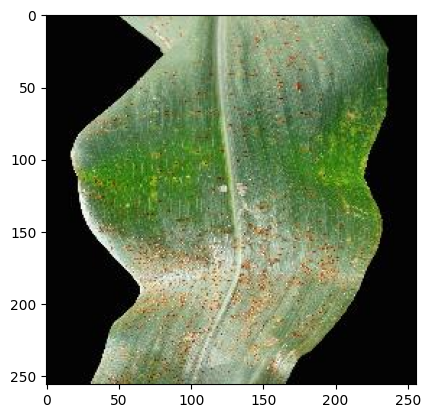

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Prediction Result is  Corn_(maize)___Common_rust_


In [22]:
imagesp='/content/plantvillage dataset/color/Corn_(maize)___Common_rust_/RS_Rust 1567.JPG'
img=mpimg.imread(imagesp)
print(img.shape)
plt.imshow(img)
plt.axis('on')
plt.show()
image_path='/content/plantvillage dataset/color/Corn_(maize)___Common_rust_/RS_Rust 1567.JPG'
prediction=predict(model,image_path,class_indices)
print("Prediction Result is ",prediction)

In [23]:
model.save('/content/drive/My Drive/my_model.h5')